
# AI Agentic Design Patterns with AutoGen

- This course is taken from Andrew Ng's deeplearning.ai/courses

  - https://learn.deeplearning.ai/courses/ai-agentic-design-patterns-with-autogen/lesson/1/introduction

- In this course covered many topics like below.

  - **Lesson 1:** Multi-Agent Conversation and Stand-up Comedy using **ConversableAgent**
  - **Lesson 2:** Sequential Chats and Customer Onboarding Chatbot using **ConversableAgent**
  - **Lesson 3:** Reflection using nested chat in **Critic/reflection** and Blogpost Writing using **AssistantAgent**
  - **Lesson 4:** (Function) **Tool Use** and Conversational Chess by registering tool and nested chats using ConversableAgent
  - **Lesson 5:** Coding and Financial Analysis using **LocalCommandLineCodeExecutor** to execute code
  - **Lesson 6:** Planning and Stock Report Generation using **Group chat**

- **Course completion**

  - https://learn.deeplearning.ai/accomplishments/3add4f78-477e-4682-936e-ff6b227957bf?usp=sharing


# Lesson 1: Multi-Agent Conversation and Stand-up Comedy  using ConversableAgent

Welcome to Lesson 1.

To access the `requirements.txt` file and the`utils` modules, please go to the `File` menu and select`Open...`.

I hope you enjoy this course!

##Pip install

In [1]:
# requirements file
# note which revision of python, for example 3.9.6
# in this file, insert all the pip install needs, include revision

# python==3.10.13
! pip install pyautogen==0.2.25 chess==1.10.0 matplotlib numpy pandas yfinance -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.1/257.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.2/314.2 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.1 MB/s eta 0:00:00


## Setup

In [ ]:

### These Content saved in utils.py file
# import os
# from dotenv import load_dotenv, find_dotenv

# # these expect to find a .env file at the directory above the lesson.                                                                                                                     # the format for that file is (without the comment)                                                                                                                                       #API_KEYNAME=AStringThatIsTheLongAPIKeyFromSomeService
# def load_env():
#     _ = load_dotenv(find_dotenv())

# def get_openai_api_key():
#     load_env()
#     openai_api_key = os.getenv("OPENAI_API_KEY")
#     return openai_api_key

### this utils.py file called in this notebook to do connection
# from utils import get_openai_api_key
# OPENAI_API_KEY = get_openai_api_key()



In [2]:

import os
from google.colab import userdata

OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

llm_config = {"model": "gpt-3.5-turbo"}

## Define an AutoGen agent

In [12]:
from autogen import ConversableAgent

agent = ConversableAgent(
    name="chatbot",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

[autogen.oai.client: 12-25 08:28:31] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


In [13]:
reply = agent.generate_reply(
    messages=[{"content": "Tell me a joke.", "role": "user"}]
)
print(reply)

Sure, here is a joke for you:

Why couldn't the bicycle stand up by itself?

Because it was two tired! 😄


In [14]:
reply = agent.generate_reply(
    messages=[{"content": "Repeat the joke.", "role": "user"}]
)
print(reply)

Of course! What do you call an alligator in a vest? An investigator!


## Conversation betwwen 2 agents

Setting up a conversation between two agents, Cathy and Joe, where the memory of their interactions is retained.

In [15]:
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "Start the next joke from the punchline of the previous joke.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

[autogen.oai.client: 12-25 08:32:21] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 12-25 08:32:21] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


**Note**: You might get a slightly different response (set of jokes) than what is shown in the video

In [16]:
chat_result = joe.initiate_chat(
    recipient=cathy,
    message="I'm Joe. Cathy, let's keep the jokes rolling.",
    max_turns=2,
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe! Why did the scarecrow win an award? Because he was outstanding in his field!

--------------------------------------------------------------------------------
joe (to cathy):

Haha, outstanding in his field! Just like my dating life, always chasing birds away.

--------------------------------------------------------------------------------
cathy (to joe):

Sounds like you need a more "fowl-proof" approach, Joe!

--------------------------------------------------------------------------------


## Print some results

You can print out:

1. Chat history
2. Cost
3. Summary of the conversation

In [20]:
chat_result

ChatResult(chat_id=None, chat_history=[{'content': "I'm Joe. Cathy, let's keep the jokes rolling.", 'role': 'assistant'}, {'content': 'Hey Joe! Why did the scarecrow win an award? Because he was outstanding in his field!', 'role': 'user'}, {'content': 'Haha, outstanding in his field! Just like my dating life, always chasing birds away.', 'role': 'assistant'}, {'content': 'Sounds like you need a more "fowl-proof" approach, Joe!', 'role': 'user'}], summary='Sounds like you need a more "fowl-proof" approach, Joe!', cost={'usage_including_cached_inference': {'total_cost': 0.00018150000000000002, 'gpt-3.5-turbo-0125': {'cost': 0.00018150000000000002, 'prompt_tokens': 192, 'completion_tokens': 57, 'total_tokens': 249}}, 'usage_excluding_cached_inference': {'total_cost': 0.00018150000000000002, 'gpt-3.5-turbo-0125': {'cost': 0.00018150000000000002, 'prompt_tokens': 192, 'completion_tokens': 57, 'total_tokens': 249}}}, human_input=[])

In [17]:
import pprint

pprint.pprint(chat_result.chat_history)

[{'content': "I'm Joe. Cathy, let's keep the jokes rolling.",
  'role': 'assistant'},
 {'content': 'Hey Joe! Why did the scarecrow win an award? Because he was '
             'outstanding in his field!',
  'role': 'user'},
 {'content': 'Haha, outstanding in his field! Just like my dating life, always '
             'chasing birds away.',
  'role': 'assistant'},
 {'content': 'Sounds like you need a more "fowl-proof" approach, Joe!',
  'role': 'user'}]


In [18]:
pprint.pprint(chat_result.cost)

{'usage_excluding_cached_inference': {'gpt-3.5-turbo-0125': {'completion_tokens': 57,
                                                             'cost': 0.00018150000000000002,
                                                             'prompt_tokens': 192,
                                                             'total_tokens': 249},
                                      'total_cost': 0.00018150000000000002},
 'usage_including_cached_inference': {'gpt-3.5-turbo-0125': {'completion_tokens': 57,
                                                             'cost': 0.00018150000000000002,
                                                             'prompt_tokens': 192,
                                                             'total_tokens': 249},
                                      'total_cost': 0.00018150000000000002}}


In [19]:
pprint.pprint(chat_result.summary)

'Sounds like you need a more "fowl-proof" approach, Joe!'


## Get a better summary of the conversation

In [21]:
chat_result = joe.initiate_chat(
    cathy,
    message="I'm Joe. Cathy, let's keep the jokes rolling.",
    max_turns=2,
    summary_method="reflection_with_llm",
    summary_prompt="Summarize the conversation",
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe! Why did the scarecrow win an award? Because he was outstanding in his field!

--------------------------------------------------------------------------------
joe (to cathy):

Haha, outstanding in his field! Just like my dating life, always chasing birds away.

--------------------------------------------------------------------------------
cathy (to joe):

Sounds like you need a more "fowl-proof" approach, Joe!

--------------------------------------------------------------------------------


In [22]:
pprint.pprint(chat_result.summary)

('Joe and Cathy share jokes about scarecrows and dating, with Joe joking about '
 'chasing birds away in his dating life.')


## Chat Termination

Chat can be terminated using a termination conditions.

In [23]:
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    llm_config=llm_config,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"],
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    llm_config=llm_config,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"] or "Goodbye" in msg["content"],
)

[autogen.oai.client: 12-25 08:37:13] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 12-25 08:37:13] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


In [24]:
chat_result = joe.initiate_chat(
    recipient=cathy,
    message="I'm Joe. Cathy, let's keep the jokes rolling."
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe! Why did the scarecrow win an award? Because he was outstanding in his field!

--------------------------------------------------------------------------------
joe (to cathy):

Haha, classic one, Cathy! Speaking of awards, I always tell people I should win an award for pretending to be awake during morning meetings.

--------------------------------------------------------------------------------
cathy (to joe):

Haha, I think a lot of people would be competing for that award, Joe! Maybe we should start a support group for morning meeting survivors.

--------------------------------------------------------------------------------
joe (to cathy):

Ha! That's a great idea, Cathy. We could call it "The Morning Meeting Misfits." I think we'd have a pretty big turnout.

------------------------------------------------------

In [26]:
pprint.pprint(chat_result.cost)

{'usage_excluding_cached_inference': {'gpt-3.5-turbo-0125': {'completion_tokens': 491,
                                                             'cost': 0.002993,
                                                             'prompt_tokens': 4513,
                                                             'total_tokens': 5004},
                                      'total_cost': 0.002993},
 'usage_including_cached_inference': {'gpt-3.5-turbo-0125': {'completion_tokens': 491,
                                                             'cost': 0.002993,
                                                             'prompt_tokens': 4513,
                                                             'total_tokens': 5004},
                                      'total_cost': 0.002993}}


In [27]:
pprint.pprint(chat_result.summary)

'Goodbye, Joe! Stay strong and keep laughing! I gotta go.'


In [28]:
cathy.send(message="What's last joke we talked about?", recipient=joe)

cathy (to joe):

What's last joke we talked about?

--------------------------------------------------------------------------------
joe (to cathy):

The last joke we talked about was about the Morning Meeting Misfits conquering the morning meeting madness with humor and friendship.

--------------------------------------------------------------------------------
cathy (to joe):

Got it, thank you! I gotta go.

--------------------------------------------------------------------------------


# Lesson 2: Sequential Chats and Customer Onboarding Chatbot using ConversableAgent

### Sequential_agent  
  ![plot](./images/Sequential_agent.png)

### Sequential_agent_flow
  ![plot](./images/Sequential_agent_flow.png)

In [29]:
llm_config={"model": "gpt-3.5-turbo"}

In [30]:
from autogen import ConversableAgent

## Creating the needed agents

### onboarding_personal_information_agent

In [31]:
onboarding_personal_information_agent = ConversableAgent(
    name="Onboarding Personal Information Agent",
    system_message='''You are a helpful customer onboarding agent,
    you are here to help new customers get started with our product.
    Your job is to gather customer's name and location.
    Do not ask for other information. Return 'TERMINATE'
    when you have gathered all the information.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

[autogen.oai.client: 12-25 08:49:34] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


### onboarding_topic_preference_agent

In [32]:
onboarding_topic_preference_agent = ConversableAgent(
    name="Onboarding Topic preference Agent",
    system_message='''You are a helpful customer onboarding agent,
    you are here to help new customers get started with our product.
    Your job is to gather customer's preferences on news topics.
    Do not ask for other information.
    Return 'TERMINATE' when you have gathered all the information.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

[autogen.oai.client: 12-25 08:49:55] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


### customer_engagement_agent

In [33]:
customer_engagement_agent = ConversableAgent(
    name="Customer Engagement Agent",
    system_message='''You are a helpful customer service agent
    here to provide fun for the customer based on the user's
    personal information and topic preferences.
    This could include fun facts, jokes, or interesting stories.
    Make sure to make it engaging and fun!
    Return 'TERMINATE' when you are done.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

[autogen.oai.client: 12-25 08:50:13] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


### customer_proxy_agent
- Ths behaves as User agent/User proxy agent, which will get input from Human as well if required

In [34]:
customer_proxy_agent = ConversableAgent(
    name="customer_proxy_agent",
    llm_config=False,
    code_execution_config=False,
    human_input_mode="ALWAYS",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

## Creating tasks

Now, you can craft a series of tasks to facilitate the onboarding process.

In [35]:
chats = [
    {
        "sender": onboarding_personal_information_agent,
        "recipient": customer_proxy_agent,
        "message":
            "Hello, I'm here to help you get started with our product."
            "Could you tell me your name and location?",
        "summary_method": "reflection_with_llm",
        "summary_args": {
            "summary_prompt" : "Return the customer information "
                             "into as JSON object only: "
                             "{'name': '', 'location': ''}",
        },
        "max_turns": 2,
        "clear_history" : True
    },
    {
        "sender": onboarding_topic_preference_agent,
        "recipient": customer_proxy_agent,
        "message":
                "Great! Could you tell me what topics you are "
                "interested in reading about?",
        "summary_method": "reflection_with_llm",
        "max_turns": 1,
        "clear_history" : False
    },
    {
        "sender": customer_proxy_agent,
        "recipient": customer_engagement_agent,
        "message": "Let's find something fun to read.",
        "max_turns": 1,
        "summary_method": "reflection_with_llm",
    },
]

## Start the onboarding process

**Note**: You might get a slightly different response than what's shown in the video. Feel free to try different inputs, such as name, location, and preferences.

In [36]:
from autogen import initiate_chats

chat_results = initiate_chats(chats)


********************************************************************************
Starting a new chat....

********************************************************************************
Onboarding Personal Information Agent (to customer_proxy_agent):

Hello, I'm here to help you get started with our product.Could you tell me your name and location?

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/autogen/agentchat/chat.py:47: UserWarning: Repetitive recipients detected: The chat history will be cleared by default if a recipient appears more than once. To retain the chat history, please set 'clear_history=False' in the configuration of the repeating agent.
  warnings.warn(


Provide feedback to Onboarding Personal Information Agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: Prabha
customer_proxy_agent (to Onboarding Personal Information Agent):

Prabha

--------------------------------------------------------------------------------
Onboarding Personal Information Agent (to customer_proxy_agent):

Great, thank you for providing your name. Could you also please tell me your location?

--------------------------------------------------------------------------------
Provide feedback to Onboarding Personal Information Agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: Uppinakudru
customer_proxy_agent (to Onboarding Personal Information Agent):

Uppinakudru

--------------------------------------------------------------------------------

********************************************************************************
Starting a new chat....

**********************************************

In [37]:
chat_results

[ChatResult(chat_id=None, chat_history=[{'content': "Hello, I'm here to help you get started with our product.Could you tell me your name and location?", 'role': 'assistant'}, {'content': 'Prabha', 'role': 'user'}, {'content': 'Great, thank you for providing your name. Could you also please tell me your location?', 'role': 'assistant'}, {'content': 'Uppinakudru', 'role': 'user'}], summary='{\n  "name": "Prabha",\n  "location": "Uppinakudru"\n}', cost={'usage_including_cached_inference': {'total_cost': 0.0001605, 'gpt-3.5-turbo-0125': {'cost': 0.0001605, 'prompt_tokens': 192, 'completion_tokens': 43, 'total_tokens': 235}}, 'usage_excluding_cached_inference': {'total_cost': 0.0001605, 'gpt-3.5-turbo-0125': {'cost': 0.0001605, 'prompt_tokens': 192, 'completion_tokens': 43, 'total_tokens': 235}}}, human_input=[]),
 ChatResult(chat_id=None, chat_history=[{'content': 'Great! Could you tell me what topics you are interested in reading about?\nContext: \n{\n  "name": "Prabha",\n  "location": "

## Print out the summary

In [38]:
for chat_result in chat_results:
    print(chat_result.summary)
    print("\n")

{
  "name": "Prabha",
  "location": "Uppinakudru"
}


Prabha is interested in reading about kids engaging in different activities.


Prabha is interested in reading about kids engaging in different activities like solving mysteries or going on adventures. A fun suggestion is to read books from "The Hardy Boys" or "Nancy Drew" series.




## Print out the cost

In [39]:
for chat_result in chat_results:
    print(chat_result.cost)
    print("\n")

{'usage_including_cached_inference': {'total_cost': 0.0001605, 'gpt-3.5-turbo-0125': {'cost': 0.0001605, 'prompt_tokens': 192, 'completion_tokens': 43, 'total_tokens': 235}}, 'usage_excluding_cached_inference': {'total_cost': 0.0001605, 'gpt-3.5-turbo-0125': {'cost': 0.0001605, 'prompt_tokens': 192, 'completion_tokens': 43, 'total_tokens': 235}}}


{'usage_including_cached_inference': {'total_cost': 5.9999999999999995e-05, 'gpt-3.5-turbo-0125': {'cost': 5.9999999999999995e-05, 'prompt_tokens': 75, 'completion_tokens': 15, 'total_tokens': 90}}, 'usage_excluding_cached_inference': {'total_cost': 5.9999999999999995e-05, 'gpt-3.5-turbo-0125': {'cost': 5.9999999999999995e-05, 'prompt_tokens': 75, 'completion_tokens': 15, 'total_tokens': 90}}}


{'usage_including_cached_inference': {'total_cost': 0.000351, 'gpt-3.5-turbo-0125': {'cost': 0.000351, 'prompt_tokens': 294, 'completion_tokens': 136, 'total_tokens': 430}}, 'usage_excluding_cached_inference': {'total_cost': 0.000351, 'gpt-3.5-turbo-

# Lesson 3: Reflection using nested chat in Critic and Blogpost Writing using AssistantAgent

### reflection_critic_agent_flow  
  ![plot](./images/reflection_critic_agent_flow.png)

### reflection_critic_agent_with_nested_reviewier_flow
  ![plot](./images/reflection_critic_agent_with_nested_reviewier_flow.png)

## Setup

In [40]:
llm_config = {"model": "gpt-3.5-turbo"}

## The task!

In [41]:
task = '''
        Write a concise but engaging blogpost about
       DeepLearning.AI. Make sure the blogpost is
       within 100 words.
       '''

## Create a writer agent

In [42]:
import autogen

writer = autogen.AssistantAgent(
    name="Writer",
    system_message="You are a writer. You write engaging and concise "
        "blogpost (with title) on given topics. You must polish your "
        "writing based on the feedback you receive and give a refined "
        "version. Only return your final work without additional comments.",
    llm_config=llm_config,
)

[autogen.oai.client: 12-25 09:17:02] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


In [43]:
reply = writer.generate_reply(messages=[{"content": task, "role": "user"}])

In [44]:
print(reply)

Title: "Unleashing the Power of Deep Learning with DeepLearning.AI"

Are you eager to dive into the world of deep learning and artificial intelligence? Look no further than DeepLearning.AI. Founded by the renowned AI expert Andrew Ng, this platform offers top-tier courses that demystify complex AI concepts. From neural networks to computer vision, DeepLearning.AI provides accessible and comprehensive learning opportunities for tech enthusiasts at all levels. Join this vibrant online community today to unlock the endless possibilities of deep learning and shape the future of technology. Get ready to embark on an exciting learning journey with DeepLearning.AI!


## Adding Simple reflection by critic agent

Create a critic agent to reflect on the work of the writer agent.

In [45]:
critic = autogen.AssistantAgent(
    name="Critic",
    is_termination_msg=lambda x: x.get("content", "").find("TERMINATE") >= 0,
    llm_config=llm_config,
    system_message="You are a critic. You review the work of "
                "the writer and provide constructive "
                "feedback to help improve the quality of the content.",
)

[autogen.oai.client: 12-25 09:18:06] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


In [46]:
res = critic.initiate_chat(
    recipient=writer,
    message=task,
    max_turns=2,
    summary_method="last_msg" # Here it takes previous response to continue
)

Critic (to Writer):


        Write a concise but engaging blogpost about
       DeepLearning.AI. Make sure the blogpost is
       within 100 words.
       

--------------------------------------------------------------------------------
Writer (to Critic):

Title: "Unleashing the Power of Deep Learning with DeepLearning.AI"

Are you eager to dive into the world of deep learning and artificial intelligence? Look no further than DeepLearning.AI. Founded by the renowned AI expert Andrew Ng, this platform offers top-tier courses that demystify complex AI concepts. From neural networks to computer vision, DeepLearning.AI provides accessible and comprehensive learning opportunities for tech enthusiasts at all levels. Join this vibrant online community today to unlock the endless possibilities of deep learning and shape the future of technology. Get ready to embark on an exciting learning journey with DeepLearning.AI!

------------------------------------------------------------------------

## Nested chat inside reflection/Critic Agent
Add Nested chat in critic agent to do better reflection on the work of the writer agent.

In [47]:
SEO_reviewer = autogen.AssistantAgent(
    name="SEO Reviewer",
    llm_config=llm_config,
    system_message="You are an SEO reviewer, known for "
        "your ability to optimize content for search engines, "
        "ensuring that it ranks well and attracts organic traffic. "
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role.",
)

[autogen.oai.client: 12-25 09:35:16] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


In [48]:
legal_reviewer = autogen.AssistantAgent(
    name="Legal Reviewer",
    llm_config=llm_config,
    system_message="You are a legal reviewer, known for "
        "your ability to ensure that content is legally compliant "
        "and free from any potential legal issues. "
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role.",
)

[autogen.oai.client: 12-25 09:35:20] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


In [49]:
ethics_reviewer = autogen.AssistantAgent(
    name="Ethics Reviewer",
    llm_config=llm_config,
    system_message="You are an ethics reviewer, known for "
        "your ability to ensure that content is ethically sound "
        "and free from any potential ethical issues. "
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role. ",
)

[autogen.oai.client: 12-25 09:35:23] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


In [50]:
meta_reviewer = autogen.AssistantAgent(
    name="Meta Reviewer",
    llm_config=llm_config,
    system_message="You are a meta reviewer, you aggragate and review "
    "the work of other reviewers and give a final suggestion on the content.",
)

[autogen.oai.client: 12-25 09:35:30] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


## Orchestrate the nested chats to solve the task

In [51]:
def reflection_message(recipient, messages, sender, config):
    return f'''Review the following content.
            \n\n {recipient.chat_messages_for_summary(sender)[-1]['content']}'''

In [52]:
review_chats = [
    {
     "recipient": SEO_reviewer,
     "message": reflection_message,
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" :
        "Return review into as JSON object only:"
        "{'Reviewer': '', 'Review': ''}. Here Reviewer should be your role",},
     "max_turns": 1},

    {
    "recipient": legal_reviewer,
    "message": reflection_message,
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" :
        "Return review into as JSON object only:"
        "{'Reviewer': '', 'Review': ''}.",},
     "max_turns": 1},

    {"recipient": ethics_reviewer,
     "message": reflection_message,
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" :
        "Return review into as JSON object only:"
        "{'reviewer': '', 'review': ''}",},
     "max_turns": 1},

     {"recipient": meta_reviewer,
      "message": "Aggregrate feedback from all reviewers and give final suggestions on the writing.",
     "max_turns": 1},
]


### use agent's register_nested_chats to register nested chat

In [53]:
critic.register_nested_chats(
    review_chats,  #Mostly review_chats each dictionary is passed as one chat
    trigger=writer,
)

**Note**: You might get a slightly different response than what's shown in the video. Feel free to try different task.

In [54]:
#Initiate Critic agent with Writer agent
res = critic.initiate_chat(
    recipient=writer,
    message=task, #Input Tak
    max_turns=2,
    summary_method="last_msg"
)

Critic (to Writer):


        Write a concise but engaging blogpost about
       DeepLearning.AI. Make sure the blogpost is
       within 100 words.
       

--------------------------------------------------------------------------------
Writer (to Critic):

Title: "Unleashing the Power of Deep Learning with DeepLearning.AI"

Are you eager to dive into the world of deep learning and artificial intelligence? Look no further than DeepLearning.AI. Founded by the renowned AI expert Andrew Ng, this platform offers top-tier courses that demystify complex AI concepts. From neural networks to computer vision, DeepLearning.AI provides accessible and comprehensive learning opportunities for tech enthusiasts at all levels. Join this vibrant online community today to unlock the endless possibilities of deep learning and shape the future of technology. Get ready to embark on an exciting learning journey with DeepLearning.AI!

------------------------------------------------------------------------

In [56]:
res

ChatResult(chat_id=None, chat_history=[{'content': '\n        Write a concise but engaging blogpost about\n       DeepLearning.AI. Make sure the blogpost is\n       within 100 words.\n       ', 'role': 'assistant'}, {'content': 'Title: "Unleashing the Power of Deep Learning with DeepLearning.AI"\n\nAre you eager to dive into the world of deep learning and artificial intelligence? Look no further than DeepLearning.AI. Founded by the renowned AI expert Andrew Ng, this platform offers top-tier courses that demystify complex AI concepts. From neural networks to computer vision, DeepLearning.AI provides accessible and comprehensive learning opportunities for tech enthusiasts at all levels. Join this vibrant online community today to unlock the endless possibilities of deep learning and shape the future of technology. Get ready to embark on an exciting learning journey with DeepLearning.AI!', 'role': 'user'}, {'content': "After aggregating the feedback from the reviewers, it is clear that th

## Get the summary

In [55]:
print(res.summary)

Title: "Master Deep Learning with DeepLearning.AI: Courses by Andrew Ng"

Unlock the potential of deep learning and AI through DeepLearning.AI, founded by the esteemed expert Andrew Ng. Explore high-quality courses covering neural networks, computer vision, and more. Whether you're a beginner or advanced learner, this platform offers accessible learning tailored to all levels. Dive into a vibrant community and shape the future of technology. Discover the possibilities of deep learning today! 

Refined version:

Title: "Master Deep Learning with DeepLearning.AI: Courses by Andrew Ng"

Explore the world of deep learning and artificial intelligence with DeepLearning.AI, founded by renowned expert Andrew Ng. Access top-tier courses on neural networks, computer vision, and more for learners of all levels. Join a vibrant community and shape the future of technology. Discover the endless possibilities of deep learning today!


## Get the Cost

In [60]:
res.cost

{'usage_including_cached_inference': {'total_cost': 0.0018479999999999998,
  'gpt-3.5-turbo-0125': {'cost': 0.0018479999999999998,
   'prompt_tokens': 1287,
   'completion_tokens': 803,
   'total_tokens': 2090}},
 'usage_excluding_cached_inference': {'total_cost': 0.001398,
  'gpt-3.5-turbo-0125': {'cost': 0.001398,
   'prompt_tokens': 1113,
   'completion_tokens': 561,
   'total_tokens': 1674}}}

# Lesson 4: (Function) Tool Use and Conversational Chess by registering tool and nested chats using ConversableAgent

### Chess_nested_chat_with_tool  
  ![plot](./images/Chess_nested_chat_with_tool.png)

### Chess_nested_chat_with_tool_flow
  ![plot](./images/Chess_nested_chat_with_tool_flow.png)

## Setup

In [61]:
llm_config = {"model": "gpt-4-turbo"}

In [79]:
import chess
import chess.svg
from typing_extensions import Annotated

## Initialize the chess board

In [63]:
board = chess.Board()

In [64]:
made_move = False

## Define the needed tools

### 1. Tool for getting legal moves

### Function  - get_legal_moves
- Here output is an string in UCI format, which agent can understand

In [65]:
def get_legal_moves(

) -> Annotated[str, "A list of legal moves in UCI format"]:
    return "Possible moves are: " + ",".join(
        [str(move) for move in board.legal_moves]
    )

### 2. Tool for making a move on the board  - make_move

### Function  - make_move

In [66]:
def make_move(
    move: Annotated[str, "A move in UCI format."]
) -> Annotated[str, "Result of the move."]:
    move = chess.Move.from_uci(move)
    board.push_uci(str(move))
    global made_move
    made_move = True

    # Display the board. This creates chess board
    display(
        chess.svg.board(
            board,
            arrows=[(move.from_square, move.to_square)],
            fill={move.from_square: "gray"},
            size=200
        )
    )

    # Get the piece name.
    piece = board.piece_at(move.to_square) #recent moved piece
    piece_symbol = piece.unicode_symbol()
    piece_name = (  #recent moved piece name
        chess.piece_name(piece.piece_type).capitalize()
        if piece_symbol.isupper()
        else chess.piece_name(piece.piece_type)
    )
    return f"Moved {piece_name} ({piece_symbol}) from "\
    f"{chess.SQUARE_NAMES[move.from_square]} to "\
    f"{chess.SQUARE_NAMES[move.to_square]}."

## Create agents

You will create the player agents and a board proxy agents for the chess board.

In [67]:
from autogen import ConversableAgent

#### Agent - player_white

In [69]:
# Player white agent
player_white = ConversableAgent(
    name="Player White",
    system_message="You are a chess player and you play as white. "
    "First call get_legal_moves(), to get a list of legal moves. "
    "Then call make_move(move) to make a move.",
    llm_config=llm_config,
)

[autogen.oai.client: 12-25 09:57:03] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


#### Agent - player_black

In [70]:
# Player black agent
player_black = ConversableAgent(
    name="Player Black",
    system_message="You are a chess player and you play as black. "
    "First call get_legal_moves(), to get a list of legal moves. "
    "Then call make_move(move) to make a move.",
    llm_config=llm_config,
)

[autogen.oai.client: 12-25 09:57:09] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


#### Function  - check_made_move

In [71]:
def check_made_move(msg):
    global made_move
    if made_move:
        made_move = False
        return True
    else:
        return False


#### Agent - board_proxy

In [74]:
board_proxy = ConversableAgent(
    name="Board Proxy",
    llm_config=False,
    is_termination_msg=check_made_move,
    default_auto_reply="Please make a move.",
    human_input_mode="NEVER",
)

## Register the tools

A tool must be registered for the agent that calls the tool and the agent that executes the tool.

In [72]:
from autogen import register_function

In [75]:
for caller in [player_white, player_black]: # Register player_white and player_black agents its list of tools
    # tool1: get_legal_moves
    register_function(
        get_legal_moves,
        caller=caller,
        executor=board_proxy,  # Executer name
        name="get_legal_moves",  # Tool name
        description="Get legal moves.",
    )

    # tool2: make_move
    register_function(
        make_move,
        caller=caller,
        executor=board_proxy,  # Executer name
        name="make_move",  # Tool name
        description="Call this tool to make a move.",
    )

[autogen.oai.client: 12-25 10:01:24] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 12-25 10:01:25] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 12-25 10:01:25] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 12-25 10:01:25] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


In [76]:
#See tools list under agent player_black
player_black.llm_config["tools"]

[{'type': 'function',
  'function': {'description': 'Get legal moves.',
   'name': 'get_legal_moves',
   'parameters': {'type': 'object', 'properties': {}, 'required': []}}},
 {'type': 'function',
  'function': {'description': 'Call this tool to make a move.',
   'name': 'make_move',
   'parameters': {'type': 'object',
    'properties': {'move': {'type': 'string',
      'description': 'A move in UCI format.'}},
    'required': ['move']}}}]

## Register the nested chats

Each player agent will have a nested chat with the board proxy agent to
make moves on the chess board.

### use agent's register_nested_chats to register nested chat

In [77]:
player_white.register_nested_chats(
    trigger=player_black,
    chat_queue=[
        {
            "sender": board_proxy,
            "recipient": player_white,
            "summary_method": "last_msg",
        }
    ],
)

player_black.register_nested_chats(
    trigger=player_white,
    chat_queue=[
        {
            "sender": board_proxy,
            "recipient": player_black,
            "summary_method": "last_msg",
        }
    ],
)

## Start the Game

The game will start with the first message.

<p style="background-color:#ECECEC; padding:15px; "> <b>Note:</b> In this lesson, you will use GPT 4 for better results. Please note that the lesson has a quota limit. If you want to explore the code in this lesson further, we recommend trying it locally with your own API key.

**Note**: You might get a slightly different moves than what's shown in the video.

Player Black (to Player White):

Let's play chess! Your move.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...

********************************************************************************
Starting a new chat....

********************************************************************************
Board Proxy (to Player White):

Let's play chess! Your move.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Player White (to Board Proxy):

***** Suggested tool call (call_S4mu8a54W8P3gzfAXQtLgW5g): get_legal_moves *****
Arguments: 
{}
********************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING FUNCTION get_legal_moves...
Board Proxy (to Player White):

Board Proxy (to Player White):

***** Response from calling tool (call_S4mu8a54W8P3gzfAXQtLgW5

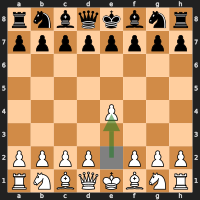

Board Proxy (to Player White):

Board Proxy (to Player White):

***** Response from calling tool (call_iKpWDLYJyT3ocBd05A8OUrRZ) *****
Moved pawn (♙) from e2 to e4.
**********************************************************************

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Player White (to Board Proxy):

I've moved my pawn from e2 to e4. Your turn!

--------------------------------------------------------------------------------
Player White (to Player Black):

I've moved my pawn from e2 to e4. Your turn!

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...

********************************************************************************
Starting a new chat....

********************************************************************************
Board Proxy (to Player Black):

I've moved my pawn from e2 to e4. Your turn!

-------------------------------------

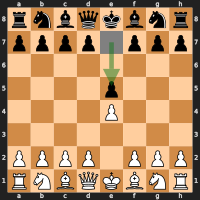

Board Proxy (to Player Black):

Board Proxy (to Player Black):

***** Response from calling tool (call_VluPPkLtxQdRz7Yp2Tvsa3YT) *****
Moved pawn (♟) from e7 to e5.
**********************************************************************

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Player Black (to Board Proxy):

I've moved my pawn from e7 to e5. Your move!

--------------------------------------------------------------------------------
Player Black (to Player White):

I've moved my pawn from e7 to e5. Your move!

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...

********************************************************************************
Starting a new chat....

********************************************************************************
Board Proxy (to Player White):

I've moved my pawn from e7 to e5. Your move!

-------------------------------------

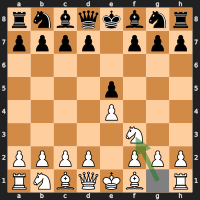

Board Proxy (to Player White):

Board Proxy (to Player White):

***** Response from calling tool (call_WEINnW0P0WX9tEUzGl9lTmjU) *****
Moved knight (♘) from g1 to f3.
**********************************************************************

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Player White (to Board Proxy):

I've moved my knight from g1 to f3. Your move!

--------------------------------------------------------------------------------
Player White (to Player Black):

I've moved my knight from g1 to f3. Your move!

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...

********************************************************************************
Starting a new chat....

********************************************************************************
Board Proxy (to Player Black):

I've moved my knight from g1 to f3. Your move!

-----------------------------

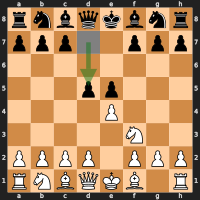

Board Proxy (to Player Black):

Board Proxy (to Player Black):

***** Response from calling tool (call_r00s5nIqlvUU1Hiv3n1WohZW) *****
Moved pawn (♟) from d7 to d5.
**********************************************************************

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Player Black (to Board Proxy):

I've moved my pawn from d7 to d5, aiming to strengthen my position in the center. Your move!

--------------------------------------------------------------------------------
Player Black (to Player White):

I've moved my pawn from d7 to d5, aiming to strengthen my position in the center. Your move!

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...

********************************************************************************
Starting a new chat....

********************************************************************************
Board Proxy (to Pla

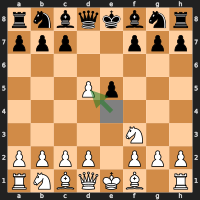

Board Proxy (to Player White):

Board Proxy (to Player White):

***** Response from calling tool (call_u5LlkToxCFIfkLT9MOX5lo49) *****
Moved pawn (♙) from e4 to d5.
**********************************************************************

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Player White (to Board Proxy):

I've captured your pawn on d5 with my pawn from e4. Your move!

--------------------------------------------------------------------------------
Player White (to Player Black):

I've captured your pawn on d5 with my pawn from e4. Your move!

--------------------------------------------------------------------------------


In [78]:
board = chess.Board()

chat_result = player_black.initiate_chat(
    player_white,
    message="Let's play chess! Your move.",
    max_turns=3, # This will stop after 3 consecutive moves
)

### It shows board with all the pawn and move. 

- Listed possible moves:
### Chess_nested_chat_move_possibilty  
  ![plot](./images/Chess_nested_chat_move_possibilty.png)


- Move:

### Chess_nested_chat_move
  ![plot](./images/Chess_nested_chat_move.png)


## Adding a fun chitchat to the game!

#### Agent - player_white with system prompt updated

In [80]:
player_white = ConversableAgent(
    name="Player White",
    system_message="You are a chess player and you play as white. "
    "First call get_legal_moves(), to get a list of legal moves. "
    "Then call make_move(move) to make a move. "
    "After a move is made, chitchat to make the game fun.",
    llm_config=llm_config,
)

[autogen.oai.client: 12-25 10:27:07] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


#### Agent - player_black with system prompt updated

In [81]:
player_black = ConversableAgent(
    name="Player Black",
    system_message="You are a chess player and you play as black. "
    "First call get_legal_moves(), to get a list of legal moves. "
    "Then call make_move(move) to make a move. "
    "After a move is made, chitchat to make the game fun.",
    llm_config=llm_config,
)

[autogen.oai.client: 12-25 10:27:40] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


#### Register the tools

In [82]:
for caller in [player_white, player_black]:
    register_function(
        get_legal_moves,
        caller=caller,
        executor=board_proxy,
        name="get_legal_moves",
        description="Get legal moves.",
    )

    register_function(
        make_move,
        caller=caller,
        executor=board_proxy,
        name="make_move",
        description="Call this tool to make a move.",
    )



[autogen.oai.client: 12-25 10:29:50] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 12-25 10:29:50] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 12-25 10:29:50] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 12-25 10:29:50] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


### use agent's register_nested_chats to register nested chat with "silent": True,

In [83]:
player_white.register_nested_chats(
    trigger=player_black,
    chat_queue=[
        {
            "sender": board_proxy,
            "recipient": player_white,
            "summary_method": "last_msg",
            "silent": True,  # This wont show intermediate comments. Like it used toshow possible moves etc
        }
    ],
)

player_black.register_nested_chats(
    trigger=player_white,
    chat_queue=[
        {
            "sender": board_proxy,
            "recipient": player_black,
            "summary_method": "last_msg",
            "silent": True,
        }
    ],
)

### Start the Game

The game will start with the first message.

Player Black (to Player White):

Let's play chess! Your move.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...

********************************************************************************
Starting a new chat....

********************************************************************************

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION get_legal_moves...

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION make_move...


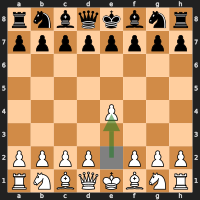


>>>>>>>> USING AUTO REPLY...
Player White (to Player Black):

I've moved my pawn to e4, a popular opening known as the King's Pawn Opening. It's your turn! What will you play in response?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...

********************************************************************************
Starting a new chat....

********************************************************************************

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION get_legal_moves...

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION make_move...


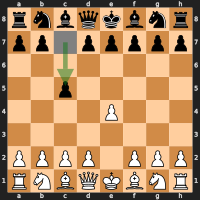


>>>>>>>> USING AUTO REPLY...
Player Black (to Player White):

Great, I've made my move playing c7 to c5, initiating the Sicilian Defense. This opening often leads to asymmetrical positions, offering plenty of complex play. What's your next move in our strategic dance on the chessboard?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...

********************************************************************************
Starting a new chat....

********************************************************************************

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION get_legal_moves...

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION make_move...


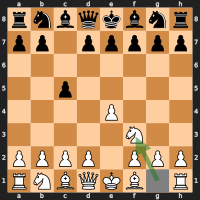


>>>>>>>> USING AUTO REPLY...
Player White (to Player Black):

I've moved my knight to f3, aiming to assert control in the center and prepare for further development. Your move! How will you continue to evolve this interesting setup?

--------------------------------------------------------------------------------


In [84]:
board = chess.Board()

chat_result = player_black.initiate_chat(
    player_white,
    message="Let's play chess! Your move.",
    max_turns=2,
)

**Note**: Now response comes with chitchat kind conversation

**Note:**
To add human input to this game, add **human_input_mode="ALWAYS"** for both player agents.

# Lesson 5: Coding and Financial Analysis using LocalCommandLineCodeExecutor to execute code

- One agent to generate code from scratch
- Another agent to execute code

### llm_code_executer_flow  
  ![plot](./images/llm_code_executer_flow.png)



## Setup

In [3]:
llm_config = {"model": "gpt-4-turbo"}

## Define a code executor
- In autogen several code executers are there, docker based executer, Jupytor note etc

In [5]:
from autogen.coding import LocalCommandLineCodeExecutor

executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding", # Create folder in colab/local all code and executed result found in this folder
)

## Create agents

In [6]:
from autogen import ConversableAgent, AssistantAgent
# AssistantAgent is a derived class from autogen, its special class in ConversableAgent

### 1. Agent with code executor configuration using ConversableAgent

In [7]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False, # It wonnt use LLM model
    code_execution_config={"executor": executor}, #Uses Code executer, Code execution config with executer name
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

### 2. Agent with code writing capability using AssistantAgent

In [8]:
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False, # This agent only writes code, it wont execute code
    human_input_mode="NEVER",
)

[autogen.oai.client: 12-26 00:17:23] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


### AssistantAgent default system prompt

In [10]:
code_writer_agent_system_message = code_writer_agent.system_message

In [14]:
print("Default system message of agent code_writer_agent:\n",code_writer_agent_system_message)

Default system message of agent code_writer_agent:
 You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in th

In [15]:
print("Default system message of agent code_executor_agent:\n",code_executor_agent.system_message)

Default system message of agent code_executor_agent:
 You are a helpful AI Assistant.


## The task!

Ask the two agents to collaborate on a stock analysis task.

In [16]:
import datetime

today = datetime.datetime.now().date()
message = f"Today is {today}. "\
"Create a plot showing stock gain YTD for NVDA and TLSA. "\
"Make sure the code is in markdown code block and save the figure"\
" to a file ytd_stock_gains.png."""

<p style="background-color:#ECECEC; padding:15px; "> <b>Note:</b> In this lesson, you will use GPT 4 for better results. Please note that the lesson has a quota limit. If you want to explore the code in this lesson further, we recommend trying it locally with your own API key.

**Note**: You might see a different set of outputs than those shown in the video. The agents collaborate to generate the code needed for your task, and they might produce code with errors in the process. However, they will ultimately provide a correct code in the end.

### Initiate agent tasks: code_executor_agent with code_writer_agent
- During execution it asks for user input, just press enter, so it execute that code and save s that file in coding folder. If it has any error, it asks code_writer to generate again and executes again
    - Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:
- Once its executed, it asks same prompt to stop the run, just type 'exit/ It stops the run

In [20]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

code_executor_agent (to code_writer_agent):

Today is 2024-12-26. Create a plot showing stock gain YTD for NVDA and TLSA. Make sure the code is in markdown code block and save the figure to a file ytd_stock_gains.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To create a plot showing the Year-to-Date (YTD) stock gains for NVIDIA (NVDA) and Tesla (TSLA), you'll need to perform the following steps:

1. Fetch the historical stock data for NVDA and TSLA from the beginning of the year 2024 to today (2024-12-26).
2. Calculate the percentage gain from the opening price on the first trading day of 2024 to the latest closing price available.
3. Plot these percentage gains on a graph using a Python library such as matplotlib.
4. Save the plot to a file named `ytd_stock_gains.png`.

To execute this, you will need the `pandas`, `pandas_datareader`, and `matplotlib` Python libraries. Make sure they are installed in

### ytd_stock_gains_graph  
  ![plot](./images/ytd_stock_gains_graph.png)

### ytd_stock_gains  
  ![plot](./images/ytd_stock_gains.png)



### Generated code
- Above code, its generated code but its  failing to execute and save .png graph in codng folder
- So Just copied that code below and executed to see the graph

In [21]:
#1st time generated code
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the tickers and the time period for YTD data
tickers = ["NVDA", "TSLA"]
start_date = "2024-01-01"
end_date = "2024-12-25"

# Fetch data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate percentage change from the start of the year
price_start = data.iloc[0]
ytd_gains = ((data - price_start) / price_start) * 100

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(ytd_gains.index, ytd_gains['NVDA'], label='NVDA')
plt.plot(ytd_gains.index, ytd_gains['TSLA'], label='TSLA')
plt.title('YTD Stock Gains for NVDA and TSLA as of December 25, 2024')
plt.xlabel('Date')
plt.ylabel('Gain (%)')
plt.legend()
plt.grid(True)

# Save to file
plt.savefig('ytd_stock_gains.png')
plt.close()

[*********************100%***********************]  2 of 2 completed


[*********************100%***********************]  2 of 2 completed


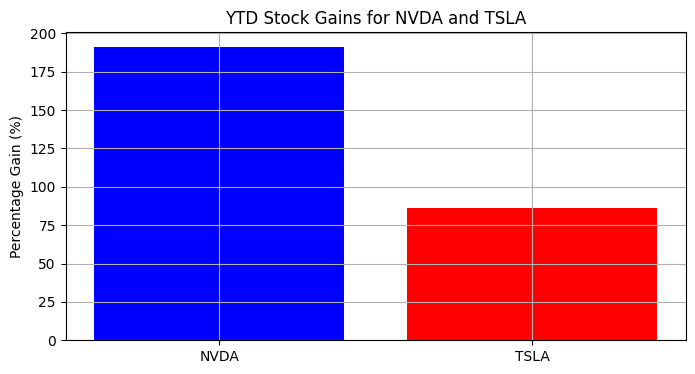

In [23]:
# I reran again, so 2nd time generated code
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbols
symbols = ['NVDA', 'TSLA']

# Fetch the data for the year 2024
data = yf.download(symbols, start="2024-01-01", end="2024-12-26")

# Calculate YTD gain. 'Adj Close' accounts for adjustments (splits/dividends)
if len(symbols) > 1:
    nvda_gain = ((data['Adj Close']['NVDA'].iloc[-1] - data['Adj Close']['NVDA'].iloc[0]) / data['Adj Close']['NVDA'].iloc[0]) * 100
    tsla_gain = ((data['Adj Close']['TSLA'].iloc[-1] - data['Adj Close']['TSLA'].iloc[0]) / data['Adj Close']['TSLA'].iloc[0]) * 100
else:
    nvda_gain = ((data['Adj Close'].iloc[-1] - data['Adj Close'].iloc[0]) / data['Adj Close'].iloc[0]) * 100

# Plotting the data
plt.figure(figsize=(8, 4))
plt.bar(['NVDA', 'TSLA'], [nvda_gain, tsla_gain], color=['blue', 'red'])
plt.ylabel('Percentage Gain (%)')
plt.title('YTD Stock Gains for NVDA and TSLA')
plt.grid(True)
plt.savefig('ytd_stock_gains.png')
plt.show()

## Let's see the plot!

**Note**:
* Your plot might differ from the one shown in the video because the LLM's freestyle code generation could choose a different plot type, such as a bar plot.
* You can re-run the previous cell and check the generated code. If it produces a bar plot, remember you can directly specify your preference by asking for a specific plot type instead of a bar plot.

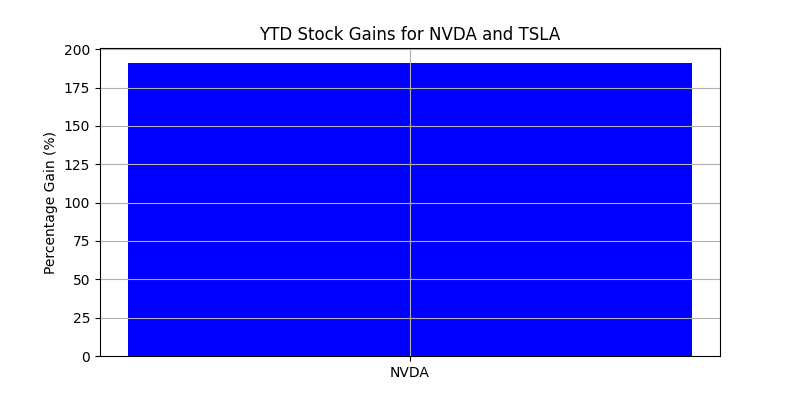

In [22]:
# To see graph generated in coding folder
import os
from IPython.display import Image

Image(os.path.join("coding", "ytd_stock_gains.png"))

**Note**: The agent will automatically save the code in a .py file and the plot in a .png file. To access and check the files generated by the agents, go to the `File` menu and select `Open....` Then, open the folder named `coding` to find all the generated files.

## User-Defined Functions

Instead of asking LLM to generate the code for downloading stock data
and plotting charts each time, you can define functions for these two tasks and have LLM call these functions in the code.

In [24]:
def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.

    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

In [25]:
def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

### Create a new executor with the user-defined functions

In [27]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices], # Define user defined function
)

### Update code_writer_agent's system_message, Here we will pass executer's all functions which we passed

In [29]:
code_writer_agent_system_message += executor.format_functions_for_prompt()
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

### Let's update the agents with the new system message

#### 1. Agent with code writing capability using ConversableAgent and updated system message

In [30]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

[autogen.oai.client: 12-26 01:13:55] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


#### 2. Agent with code execution capability using ConversableAgent and updated system message

In [31]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,# It wonnt use LLM model
    code_execution_config={"executor": executor},  #Uses Code executer, Code execution config with executer name
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

### Start the same task again!

In [32]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}."
    "Download the stock prices YTD for NVDA and TSLA and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

code_executor_agent (to code_writer_agent):

Today is 2024-12-26.Download the stock prices YTD for NVDA and TSLA and createa plot. Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

The task is to fetch Year-To-Date (YTD) stock prices for NVIDIA (NVDA) and Tesla (TSLA) and plot these prices, saving the plot to a file called `stock_prices_YTD_plot.png`.

To achieve this:
1. Use the `get_stock_prices` function to retrieve the stock prices from the beginning of the year ('2024-01-01') to the current date ('2024-12-26').
2. Use the `plot_stock_prices` function to create and save the plot.

Here is the Python script that handles these steps:

```python
# filename: fetch_and_plot_stocks.py
from functions import get_stock_prices, plot_stock_prices

# Define the stock symbols and date range
stock_symbols = ['NVDA', 'TS

### Plot the results

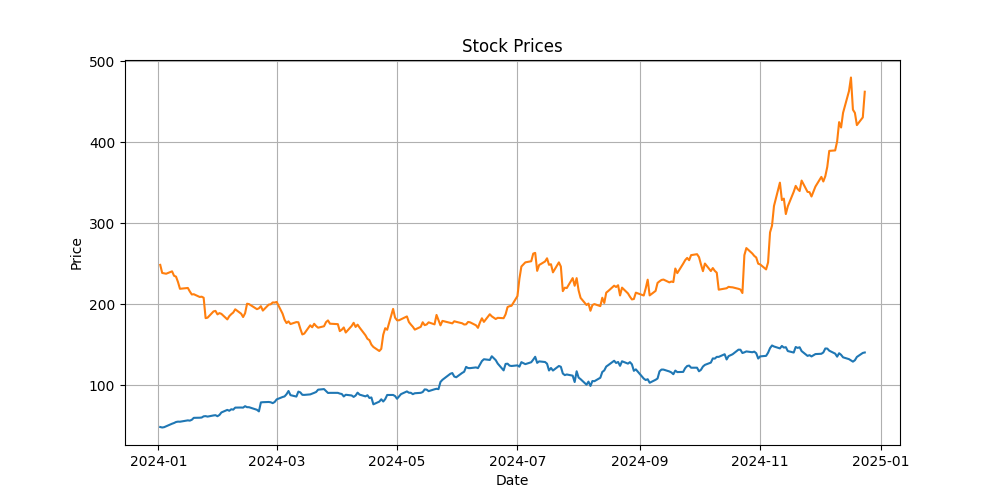

In [33]:
Image(os.path.join("coding", "stock_prices_YTD_plot.png"))

**Note**: The agent will automatically save the code in a .py file and the plot in a .png file. To access and check the files generated by the agents, go to the `File` menu and select `Open....` Then, open the folder named `coding` to find all the generated files.

- **If LLM model wont support any function calling or tools calling feature, then this user defined way with code executer we can achieve the same reult**
- **function calling or tools calling feature will have some restrictions. it can run only functions which we defined, but in this code executer approach, it ccan go beyond and do the task as well.**

### group_chat_stock_data  
  ![plot](./images/group_chat_stock_data.png)

# Lesson 6: Planning and Stock Report Generation using Group chat

### group_chat_design  
  ![plot](./images/group_chat_design.png)

### group_chat_design_summary  
  ![plot](./images/group_chat_design_summary.png)

In [35]:
llm_config={"model": "gpt-4-turbo"}

## The task!

In [36]:
task = "Write a blogpost about the stock price performance of "\
"Nvidia in the past month. Today's date is 2024-04-23."

## Build a group chat

This group chat will include these agents:

1. **User_proxy** or **Admin**: to allow the user to comment on the report and ask the writer to refine it.
2. **Planner**: to determine relevant information needed to complete the task.
3. **Engineer**: to write code using the defined plan by the planner.
4. **Executor**: to execute the code written by the engineer.
5. **Writer**: to write the report.

In [37]:
import autogen

### Define user_proxy/admin agent using ConversableAgent

In [38]:
user_proxy = autogen.ConversableAgent(
    name="Admin",
    system_message="Give the task, and send "
    "instructions to writer to refine the blog post.",
    code_execution_config=False,
    llm_config=llm_config,
    human_input_mode="ALWAYS",  # to allow the user to comment on the report and ask the writer to refine it.
)

[autogen.oai.client: 12-26 01:40:28] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


### Define Planner agent using ConversableAgent



In [62]:
planner = autogen.ConversableAgent(
    name="Planner",
    system_message="Given a task, please determine "
    "what information is needed to complete the task. "
    "Please note that the information will all be retrieved using"
    " Python code. Please only suggest information that can be "
    "retrieved using Python code. "
    "Dont use any API key  based search" # Added to avoid failure during run due to api key of some website
    "After each step is done by others, check the progress and "
    "instruct the remaining steps. If a step fails, try to "
    "workaround",
    description="Planner. Given a task, determine what "
    "information is needed to complete the task. "
    "After each step is done by others, check the progress and "
    "instruct the remaining steps",
    llm_config=llm_config,
)

[autogen.oai.client: 12-26 02:54:41] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


### Define Engineer agent to write code using AssistantAgent

In [63]:
engineer = autogen.AssistantAgent(
    name="Engineer",
    llm_config=llm_config,
    description="An engineer that writes code based on the plan "
    "provided by the planner.",
)

[autogen.oai.client: 12-26 02:54:44] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


**Note**: In this lesson, you'll use an alternative method of code execution by providing a dict config. However, you can always use the LocalCommandLineCodeExecutor if you prefer. For more details about code_execution_config, check this: https://microsoft.github.io/autogen/docs/reference/agentchat/conversable_agent/#__init__

### Define Executor agent using ConversableAgent



In [64]:
executor = autogen.ConversableAgent(
    name="Executor",
    system_message="Execute the code written by the "
    "engineer and report the result.",
    human_input_mode="NEVER",
    code_execution_config={
        "last_n_messages": 3,
        "work_dir": "coding",
        "use_docker": False,
    },
)

# Prev 5th example executer
# executor = LocalCommandLineCodeExecutor(
#     timeout=60,
#     work_dir="coding",
#     functions=[get_stock_prices, plot_stock_prices], # Define user defined function
# )

### Define Writer agent to write blog post using ConversableAgent

In [65]:
writer = autogen.ConversableAgent(
    name="Writer",
    llm_config=llm_config,
    system_message="Writer."
    "Please write blogs in markdown format (with relevant titles)"
    " and put the content in pseudo ```md``` code block. "
    "You take feedback from the admin and refine your blog.",
    description="Writer."
    "Write blogs based on the code execution results and take "
    "feedback from the admin to refine the blog."
)

[autogen.oai.client: 12-26 02:54:49] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


### Define the group chat

In [66]:
groupchat = autogen.GroupChat(
    agents=[user_proxy, engineer, writer, executor, planner],
    messages=[],
    max_round=10,
)

In [67]:
manager = autogen.GroupChatManager(
    groupchat=groupchat, llm_config=llm_config
)


[autogen.oai.client: 12-26 02:54:53] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


### Start the group chat!

<p style="background-color:#ECECEC; padding:15px; "> <b>Note:</b> In this lesson, you will use GPT 4 for better results. Please note that the lesson has a quota limit. If you want to explore the code in this lesson further, we recommend trying it locally with your own API key.

In [68]:
task

"Write a blogpost about the stock price performance of Nvidia in the past month. Today's date is 2024-04-23."

In [69]:
groupchat_result = user_proxy.initiate_chat(
    manager,
    message=task,
)

Admin (to chat_manager):

Write a blogpost about the stock price performance of Nvidia in the past month. Today's date is 2024-04-23.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Planner (to chat_manager):

To accomplish this task in Python without using an API key, we will need to retrieve and process the following information:

1. Historical stock price data for Nvidia for the period from 2024-03-23 to 2024-04-23.
2. Analyze the data to determine trends, changes, and any significant events impacting the stock price.
3. Summarize findings to be used in the blog post.

#### Step 1: Gather Historical Stock Price Data
To retrieve historical stock price data for Nvidia:
1. We can use libraries like `yfinance`, which allow fetching historical market data from Yahoo Finance, avoiding the need for an API key.
2. Determine the format and type of data needed, e.g., daily closing prices, opening prices, highs, lows, etc.

```pyt

### Result

In [70]:
groupchat_result

ChatResult(chat_id=None, chat_history=[{'content': "Write a blogpost about the stock price performance of Nvidia in the past month. Today's date is 2024-04-23.", 'role': 'assistant'}, {'content': "To accomplish this task in Python without using an API key, we will need to retrieve and process the following information:\n\n1. Historical stock price data for Nvidia for the period from 2024-03-23 to 2024-04-23.\n2. Analyze the data to determine trends, changes, and any significant events impacting the stock price.\n3. Summarize findings to be used in the blog post.\n\n#### Step 1: Gather Historical Stock Price Data\nTo retrieve historical stock price data for Nvidia:\n1. We can use libraries like `yfinance`, which allow fetching historical market data from Yahoo Finance, avoiding the need for an API key.\n2. Determine the format and type of data needed, e.g., daily closing prices, opening prices, highs, lows, etc.\n\n```python\nimport yfinance as yf\n\ndef fetch_stock_data(ticker, start_d

In [71]:
groupchat_result.summary

"The blog post provides a comprehensive overview of Nvidia's stock performance over the past month, effectively summarizing the key analytics derived from the stock data. However, to further elevate its quality and appeal to readers, consider implementing the following improvements:\n\n1. **Contextual Background**:\n   - Begin with a brief introduction to Nvidia as a company, including its industry sector and any recent events or developments that could potentially impact its stock, such as product launches or significant corporate announcements. This context helps readers understand why certain trends might be occurring.\n\n2. **Graphical Representation**:\n   - Include charts or graphs to visually represent the stock's performance over the specified period. Visual aids can make it easier for readers to grasp trends, fluctuations, and significant drop or gain points.\n\n3. **Comparative Analysis**:\n   - Compare Nvidia's performance with industry benchmarks or key competitors. This co

In [72]:
groupchat_result.cost

{'usage_including_cached_inference': {'total_cost': 0.29142,
  'gpt-4-turbo-2024-04-09': {'cost': 0.29142,
   'prompt_tokens': 27741,
   'completion_tokens': 467,
   'total_tokens': 28208}},
 'usage_excluding_cached_inference': {'total_cost': 0.28893,
  'gpt-4-turbo-2024-04-09': {'cost': 0.28893,
   'prompt_tokens': 27501,
   'completion_tokens': 464,
   'total_tokens': 27965}}}

## Add a speaker selection policy

In [53]:
user_proxy = autogen.ConversableAgent(
    name="Admin",
    system_message="Give the task, and send "
    "instructions to writer to refine the blog post.",
    code_execution_config=False,
    llm_config=llm_config,
    human_input_mode="ALWAYS",
)

planner = autogen.ConversableAgent(
    name="Planner",
    system_message="Given a task, please determine "
    "what information is needed to complete the task. "
    "Please note that the information will all be retrieved using"
    " Python code. Please only suggest information that can be "
    "retrieved using Python code. "
    "Dont use any API key  based search" # Added to avoid failure during run due to api key of some website
    "After each step is done by others, check the progress and "
    "instruct the remaining steps. If a step fails, try to "
    "workaround",
    description="Given a task, determine what "
    "information is needed to complete the task. "
    "After each step is done by others, check the progress and "
    "instruct the remaining steps",
    llm_config=llm_config,
)

engineer = autogen.AssistantAgent(
    name="Engineer",
    llm_config=llm_config,
    description="Write code based on the plan "
    "provided by the planner.",
)

writer = autogen.ConversableAgent(
    name="Writer",
    llm_config=llm_config,
    system_message="Writer. "
    "Please write blogs in markdown format (with relevant titles)"
    " and put the content in pseudo ```md``` code block. "
    "You take feedback from the admin and refine your blog.",
    description="After all the info is available, "
    "write blogs based on the code execution results and take "
    "feedback from the admin to refine the blog. ",
)

executor = autogen.ConversableAgent(
    name="Executor",
    description="Execute the code written by the "
    "engineer and report the result.",
    human_input_mode="NEVER",
    code_execution_config={
        "last_n_messages": 3,
        "work_dir": "coding",
        "use_docker": False,
    },
)

[autogen.oai.client: 12-26 02:32:19] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 12-26 02:32:19] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 12-26 02:32:20] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 12-26 02:32:20] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


### Here added speaker selection process using allowed_or_disallowed_speaker_transitions

In [54]:
groupchat = autogen.GroupChat(
    agents=[user_proxy, engineer, writer, executor, planner],
    messages=[],
    max_round=10,
    allowed_or_disallowed_speaker_transitions={  # Here we mention which are the agent order should be allowed
        user_proxy: [engineer, writer, executor, planner], # Ex: after user_prxy only engineer, writer, executor, planner are allowed
        engineer: [user_proxy, executor],
        writer: [user_proxy, planner],  # Ex: after writer only user_proxy, planner are allowed
        executor: [user_proxy, engineer, planner],
        planner: [user_proxy, engineer, writer],
    },
    speaker_transitions_type="allowed", # Enable only allowed transition based on allowed_or_disallowed_speaker_transitions
)

In [56]:
manager = autogen.GroupChatManager(
    groupchat=groupchat, llm_config=llm_config
)

groupchat_result = user_proxy.initiate_chat(
    manager,
    message=task,
)

[autogen.oai.client: 12-26 02:37:30] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


Admin (to chat_manager):

Write a blogpost about the stock price performance of Nvidia in the past month. Today's date is 2024-04-23.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Planner (to chat_manager):

To accomplish this task in Python without using an API key, we will need to retrieve and process the following information:

1. Historical stock price data for Nvidia for the period from 2024-03-23 to 2024-04-23.
2. Analyze the data to determine trends, changes, and any significant events impacting the stock price.
3. Summarize findings to be used in the blog post.

#### Step 1: Gather Historical Stock Price Data
To retrieve historical stock price data for Nvidia:
1. We can use libraries like `yfinance`, which allow fetching historical market data from Yahoo Finance, avoiding the need for an API key.
2. Determine the format and type of data needed, e.g., daily closing prices, opening prices, highs, lows, etc.

```pyt

### Result

In [61]:
groupchat_result

ChatResult(chat_id=None, chat_history=[{'content': "Write a blogpost about the stock price performance of Nvidia in the past month. Today's date is 2024-04-23.", 'role': 'assistant'}, {'content': "To accomplish this task in Python without using an API key, we will need to retrieve and process the following information:\n\n1. Historical stock price data for Nvidia for the period from 2024-03-23 to 2024-04-23.\n2. Analyze the data to determine trends, changes, and any significant events impacting the stock price.\n3. Summarize findings to be used in the blog post.\n\n#### Step 1: Gather Historical Stock Price Data\nTo retrieve historical stock price data for Nvidia:\n1. We can use libraries like `yfinance`, which allow fetching historical market data from Yahoo Finance, avoiding the need for an API key.\n2. Determine the format and type of data needed, e.g., daily closing prices, opening prices, highs, lows, etc.\n\n```python\nimport yfinance as yf\n\ndef fetch_stock_data(ticker, start_d

### Group chat summary

In [59]:
groupchat_result.summary

"The draft of your blog post provides a solid overview of Nvidia's stock performance over the designated period, alongside pointing to a key event and its implications. \n\n#### Next Steps for Finalization:\n1. **Validate Potential Causes**: To strengthen the draft, verify the hypothesized causes for the significant drop on April 22, 2024. This can involve checking major news outlets, financial news websites, and Nvidia's official announcements around that date. This task is to ensure the reasons listed are supported by evidence and not speculative.\n   \n2. **Incorporate Additional Data or Visuals**: Consider adding visual elements like graphs to represent the stock price movements over the month, highlighting the significant drop. This can make the post more engaging and informative. For creating visualizations, Python libraries such as `matplotlib` or `seaborn` could be used.\n\n3. **Review and Edit**: Ensure the post is free from errors, the flow is logical, and the language meets 

### Group chat Cost

In [60]:
groupchat_result.cost

{'usage_including_cached_inference': {'total_cost': 0.18497000000000002,
  'gpt-4-turbo-2024-04-09': {'cost': 0.18497000000000002,
   'prompt_tokens': 18425,
   'completion_tokens': 24,
   'total_tokens': 18449}},
 'usage_excluding_cached_inference': {'total_cost': 0.16653,
  'gpt-4-turbo-2024-04-09': {'cost': 0.16653,
   'prompt_tokens': 16605,
   'completion_tokens': 16,
   'total_tokens': 16621}}}

**Note**: You might experience slightly different interactions between the agents. The engineer agent may write incorrect code, which the executor agent will report and send back for correction. This process could go through multiple rounds.

> In our case its failing, asking for api key of some website to get extra details, now added some more rules in system prompt. Generally, it gets stock info from NVIDIA, **planner** makes step then **engineer** will creates python script to generate code to get stock, then **executer** executes the script and saves the result in .csv. Then **writer** reads that data and writes blog post and passes to **planner** back